- 1차 EDA & 파생변수 생성 & 2차 EDA
- 모델링 & 가설검증
- 최종 모델 

In [ ]:
#train전처리에 있는 automl
#

In [1]:
!pip install pandas-profiling
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 352.3/352.3 kB 39.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 14.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 58.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 29.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 47.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 88.0 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=ca0b8166689abeabe967267e493aa10f250c7b99bc0b0c0fee991873c5b18b35
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attemp

In [3]:
!pip install catboost
!pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 4.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# CRAWLING
import requests
from bs4 import BeautifulSoup

# EDA
from pandas_profiling import ProfileReport

# MODELING
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import f1_score, classification_report
import xgboost as xgb

from pycaret.classification import *

import warnings
warnings.filterwarnings(action='ignore')

<ipython-input-4-5f082c184258>:12: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


# 데이터 불러오기

In [5]:
emp_df = pd.read_csv("emp_train_v4.csv", index_col=0)

In [6]:
emp_df = emp_df.drop(['product_name', 'real_product', 'prod_processed', 'matches', 'employee_yn'], axis = 1)

## 상관관계

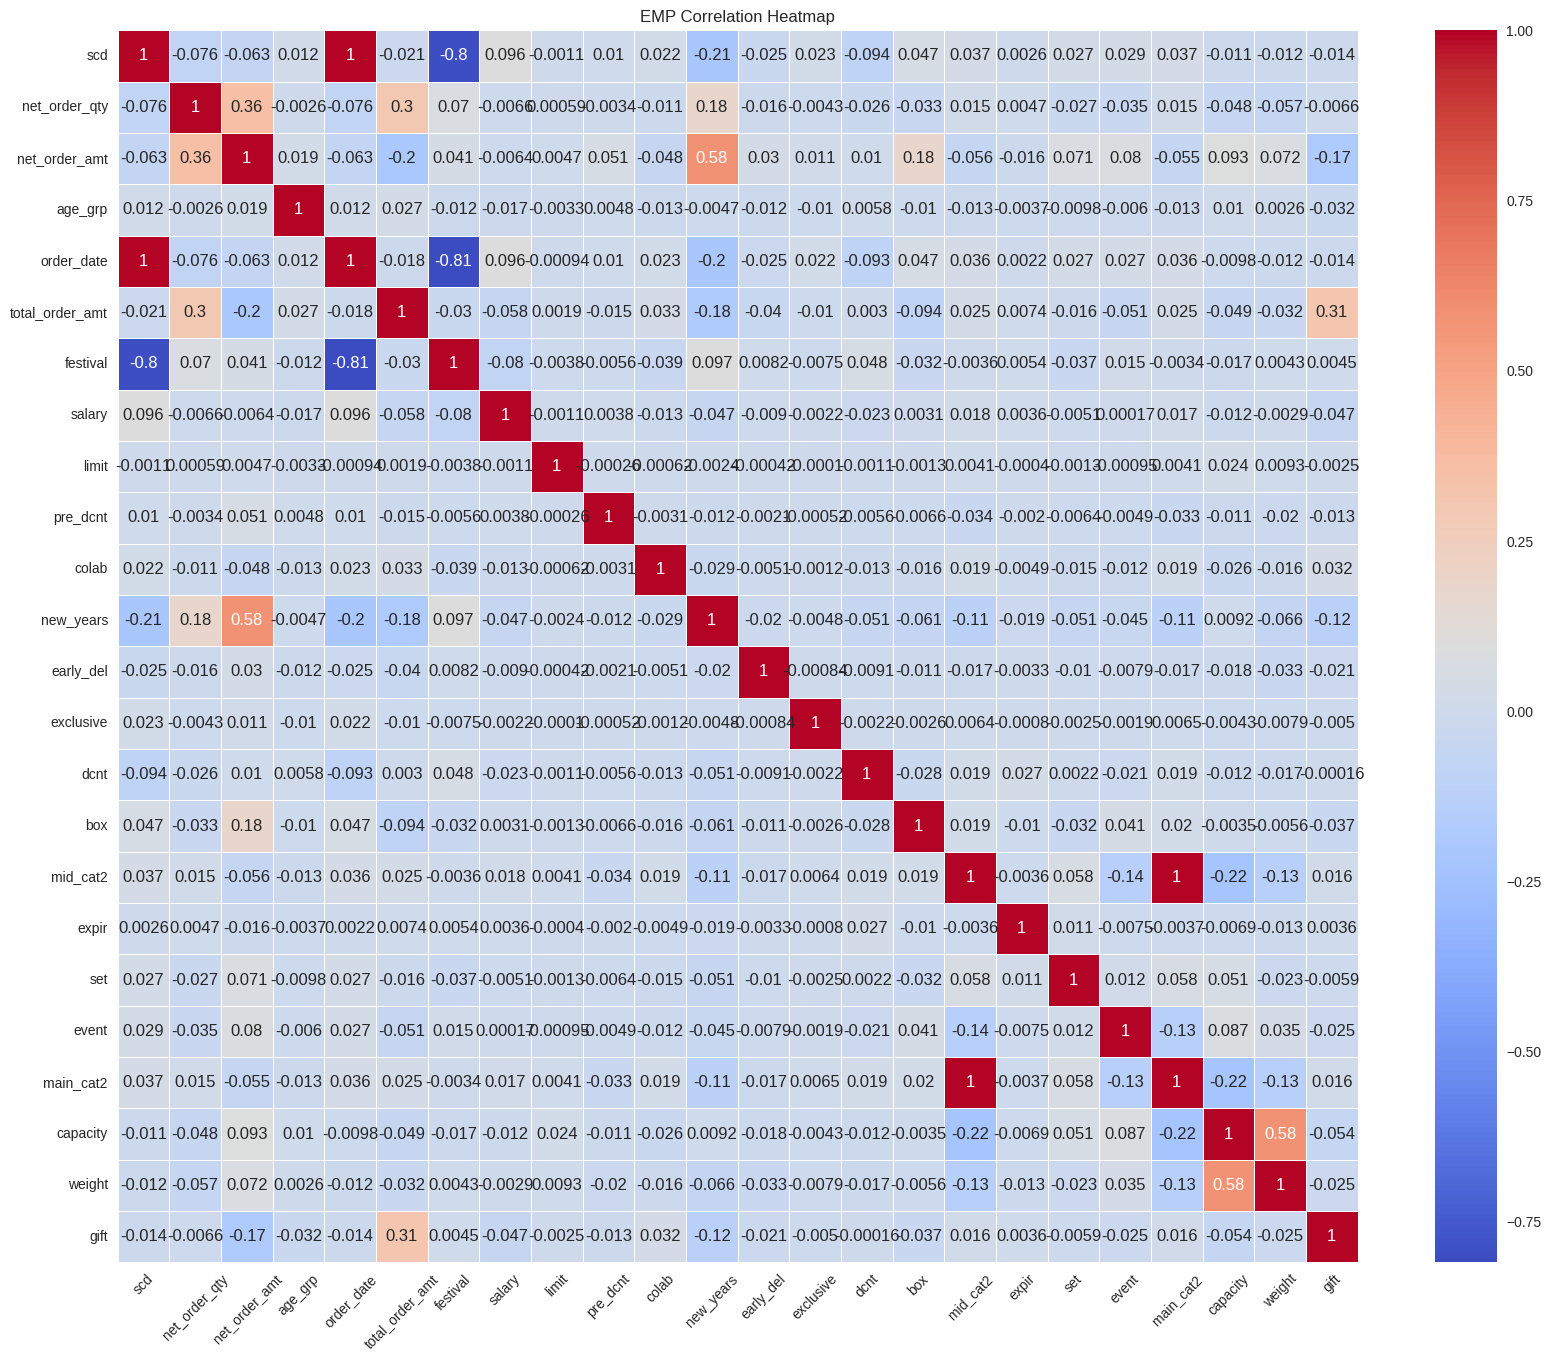

In [ ]:
# Compute the correlation matrix
corr_matrix = emp_df.corr()

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(20, 16))

# Create the heatmap
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5, ax=ax)

# Customize the plot
ax.set_title('EMP Correlation Heatmap')
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Show the plot
plt.show()

## EDA REPORT

In [ ]:
profile = ProfileReport(emp_df,
            minimal=False,
            explorative=True,
            title='EMP DATA',
            plot={'histogram': {'bins': 8}},
            pool_size=4,
            progress_bar=False)

# Report 결과 경로에 저장
profile.to_file(output_file="emp_data_eda.html")

# 전반적 모델링

In [ ]:
col2 = ['gender', 'age_gen', 'brand']
dummy_variables = pd.get_dummies(emp_df[col2])
emp_df_encoded1 = pd.concat([emp_df.drop(col2, axis=1), dummy_variables], axis=1)

In [ ]:
X = emp_df_encoded1.drop('prime_yn', axis=1)
y = emp_df_encoded1['prime_yn'].map({'N': 0, 'Y': 1})

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [ ]:
scaler = MinMaxScaler()

scaled_X_train2 = scaler.fit_transform(X_train)
scaled_X_test2 = scaler.transform(X_test)

In [ ]:
# Initialize the models
xgb = XGBClassifier()
knn = KNeighborsClassifier()
lr = LogisticRegression()
rf = RandomForestClassifier()
lgbm = LGBMClassifier()
catboost = CatBoostClassifier()
dt = DecisionTreeClassifier()
svm = SVC()

# Train the models

lr.fit(scaled_X_train, y_train)

dt.fit(X_train, y_train)
rf.fit(X_train, y_train)

svm.fit(scaled_X_train, y_train)
knn.fit(scaled_X_train2, y_train)

xgb.fit(X_train, y_train)
lgbm.fit(X_train, y_train)
catboost.fit(X_train, y_train)

Learning rate set to 0.033518
0:	learn: 0.6888247	total: 54.1ms	remaining: 54s
1:	learn: 0.6854924	total: 61.8ms	remaining: 30.8s
2:	learn: 0.6815582	total: 68.7ms	remaining: 22.8s
3:	learn: 0.6787180	total: 75.6ms	remaining: 18.8s
4:	learn: 0.6753828	total: 82.7ms	remaining: 16.5s
5:	learn: 0.6727006	total: 89.8ms	remaining: 14.9s
6:	learn: 0.6694292	total: 96.5ms	remaining: 13.7s
7:	learn: 0.6648605	total: 104ms	remaining: 12.9s
8:	learn: 0.6611921	total: 111ms	remaining: 12.2s
9:	learn: 0.6579919	total: 118ms	remaining: 11.7s
10:	learn: 0.6563751	total: 125ms	remaining: 11.2s
11:	learn: 0.6543694	total: 131ms	remaining: 10.8s
12:	learn: 0.6525107	total: 139ms	remaining: 10.5s
13:	learn: 0.6494841	total: 146ms	remaining: 10.3s
14:	learn: 0.6477095	total: 153ms	remaining: 10s
15:	learn: 0.6465918	total: 160ms	remaining: 9.81s
16:	learn: 0.6439871	total: 167ms	remaining: 9.64s
17:	learn: 0.6424986	total: 174ms	remaining: 9.47s
18:	learn: 0.6411337	total: 180ms	remaining: 9.31s
19:	lear

In [ ]:
# Predict on the test set
lr_preds = lr.predict(scaled_X_test)

dt_preds = dt.predict(X_test)
rf_preds = rf.predict(X_test)

svm_preds = svm.predict(scaled_X_test)
knn_preds = knn.predict(scaled_X_test2)

xgb_preds = xgb.predict(X_test)
lgbm_preds = lgbm.predict(X_test)
catboost_preds = catboost.predict(X_test)

In [ ]:
# Calculate F1 score

lr_f1_score = f1_score(y_test, lr_preds)

dt_f1_score = f1_score(y_test, dt_preds)
rf_f1_score = f1_score(y_test, rf_preds)

knn_f1_score = f1_score(y_test, knn_preds)
svm_f1_score = f1_score(y_test, svm_preds)

lgbm_f1_score = f1_score(y_test, lgbm_preds)
catboost_f1_score = f1_score(y_test, catboost_preds)
xgb_f1_score = f1_score(y_test, xgb_preds)

print("Logistic regression:", lr_f1_score)
print("Decision Tree:", dt_f1_score)
print("Random Forest:", rf_f1_score)
print("KNearestNeighbors:", knn_f1_score)
print("Support Vector Machine:", svm_f1_score)
print("Light Gradient Boost:", lgbm_f1_score)
print("Catboost:", catboost_f1_score)
print("XGBoost:", xgb_f1_score)


Logistic regression: 0.7598926894701542
Decision Tree: 0.8802407221664995
Random Forest: 0.8432695913010875
KNearestNeighbors: 0.7331661200077175
Support Vector Machine: 0.7636605215080552
Light Gradient Boost: 0.8702402957486137
Catboost: 0.8588322246858832
XGBoost: 0.8963531669865643


In [ ]:
# Generate classification reports
lr_report = classification_report(y_test, lr_preds)

dt_report = classification_report(y_test, dt_preds)
rf_report = classification_report(y_test, rf_preds)

knn_report = classification_report(y_test, knn_preds)
svm_report = classification_report(y_test, svm_preds)

lgbm_report = classification_report(y_test, lgbm_preds)
catboost_report = classification_report(y_test, catboost_preds)
xgb_report = classification_report(y_test, xgb_preds)

In [ ]:
print("Logistic Regression Classification Report:")
print(lr_report)
print("\n")

print("Decision Tree Classification Report:")
print(dt_report)

print("Random Forest Classification Report:")
print(rf_report)
print("\n")

print("KNN Classification Report:")
print(knn_report)
print("\n")

print("SVM Classification Report:")
print(svm_report)
print("\n")

print("LightGBM Classification Report:")
print(lgbm_report)
print("\n")

print("CatBoost Classification Report:")
print(catboost_report)
print("\n")

print("XGBoost Classification Report:")
print(xgb_report)
print("\n")


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.18      0.27      1469
           1       0.65      0.91      0.76      2492

    accuracy                           0.64      3961
   macro avg       0.60      0.54      0.51      3961
weighted avg       0.61      0.64      0.58      3961



Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80      1469
           1       0.88      0.88      0.88      2492

    accuracy                           0.85      3961
   macro avg       0.84      0.84      0.84      3961
weighted avg       0.85      0.85      0.85      3961

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.60      0.68      1469
           1       0.79      0.90      0.84      2492

    accuracy                           0.79      3961
   macro 

# XGBoost

In [ ]:
emp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19805 entries, 0 to 19804
Data columns (total 28 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   scd              19805 non-null  int64  
 1   net_order_qty    19805 non-null  int64  
 2   net_order_amt    19805 non-null  float64
 3   gender           19805 non-null  object 
 4   age_grp          19805 non-null  int64  
 5   order_date       19805 non-null  int64  
 6   prime_yn         19805 non-null  object 
 7   total_order_amt  19805 non-null  float64
 8   brand            19805 non-null  object 
 9   festival         19805 non-null  int64  
 10  salary           19805 non-null  int64  
 11  age_gen          19805 non-null  object 
 12  limit            19805 non-null  int64  
 13  pre_dcnt         19805 non-null  int64  
 14  colab            19805 non-null  int64  
 15  new_years        19805 non-null  int64  
 16  early_del        19805 non-null  int64  
 17  exclusive   

In [ ]:
emp_df['prime_yn'].value_counts()

Y    12421
N     7384
Name: prime_yn, dtype: int64

In [ ]:
emp_df['prime_yn'].value_counts()/len(emp_df)

Y    0.627165
N    0.372835
Name: prime_yn, dtype: float64

In [7]:
col2 = ['gender', 'age_gen', 'brand']
dummy_variables = pd.get_dummies(emp_df[col2])
emp_df_encoded1 = pd.concat([emp_df.drop(col2, axis=1), dummy_variables], axis=1)

In [8]:
emp_df_encoded1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19805 entries, 0 to 19804
Data columns (total 72 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   scd              19805 non-null  int64  
 1   net_order_qty    19805 non-null  int64  
 2   net_order_amt    19805 non-null  float64
 3   age_grp          19805 non-null  int64  
 4   order_date       19805 non-null  int64  
 5   prime_yn         19805 non-null  object 
 6   total_order_amt  19805 non-null  float64
 7   festival         19805 non-null  int64  
 8   salary           19805 non-null  int64  
 9   limit            19805 non-null  int64  
 10  pre_dcnt         19805 non-null  int64  
 11  colab            19805 non-null  int64  
 12  new_years        19805 non-null  int64  
 13  early_del        19805 non-null  int64  
 14  exclusive        19805 non-null  int64  
 15  dcnt             19805 non-null  int64  
 16  box              19805 non-null  int64  
 17  mid_cat2    

In [8]:
X = emp_df_encoded1.drop('prime_yn', axis=1)
y = emp_df_encoded1['prime_yn'].map({'N': 0, 'Y': 1})

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Define the parameter grid for grid search -> 다른 시도도 해보기
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [100, 200, 300, 400, 500] 
}

In [10]:
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300] 
}

In [12]:
# Create the XGBoost classifier
xgb_classifier = xgb.XGBClassifier()

# Perform k-fold cross-validation with grid search
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(xgb_classifier, param_grid, scoring='f1', cv=kfold)
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [13]:
print('final params', grid_search.best_params_)   # 최적의 파라미터 값 출력
print('best score', grid_search.best_score_)      # 최고의 점수

final params {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300}
best score 0.9074147851754117


In [14]:
# Train the model with the best parameters
best_model.fit(X_train, y_train)

# Predict on the test set
y_pred = best_model.predict(X_test)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score: %.4f" % f1)

F1 Score: 0.9115


## Feature Importance 체크

In [15]:
feature_importance = pd.DataFrame(best_model.feature_importances_.reshape((1, -1)), columns=X_train.columns, index=['feature_importance'])
feat_imp = feature_importance.transpose().sort_values(by='feature_importance', ascending=False)
feat_imp[:20] # 상위 20개

,feature_importance
box,0.055312
brand_쁘띠첼,0.040165
gift,0.038357
total_order_amt,0.037970
age_grp,0.037553
order_date,0.036615
salary,0.035108
brand_해찬들,0.034373
brand_다시다,0.031262
net_order_amt,0.029621


In [16]:
fimp = feat_imp.reset_index()
top20 = fimp[:20]

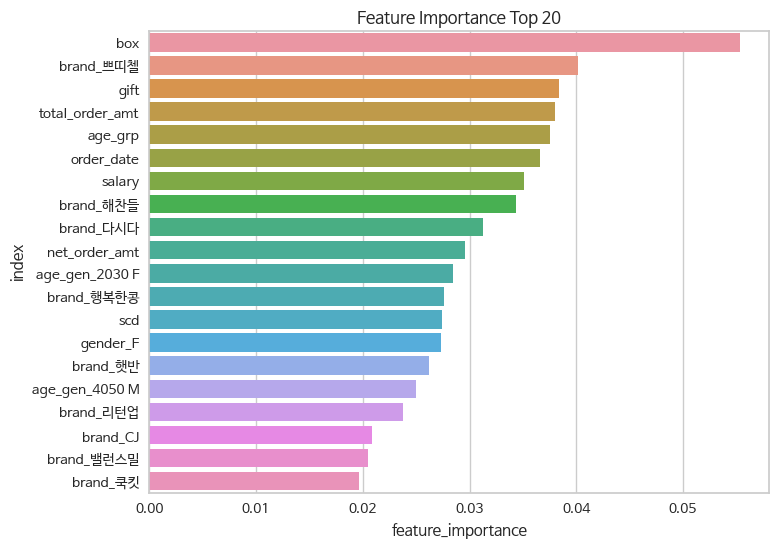

In [20]:
plt.figure(figsize=(8,6))
plt.title('Feature Importance Top 20')
sns.barplot(x= top20['feature_importance'], y= top20['index'])
plt.show()

In [19]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
import matplotlib.font_manager as fm
plt.rc('font', family='NanumBarunGothic') 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [15]:
feat_imp[-20:] # 하위 20개

,feature_importance
brand_크레잇,0.002330
brand_롯데,0.002072
brand_산들애,0.001795
brand_육공육,0.000000
brand_이너비,0.000000
brand_계절밥상,0.000000
brand_아이누리,0.000000
brand_미트마스터 한돈,0.000000
brand_메티에,0.000000
brand_닥터뉴트리,0.000000


# Decision Tree

In [ ]:
# Define the parameter grid for grid search
param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the Decision Tree classifier
dt = DecisionTreeClassifier()

# Perform k-fold cross-validation with grid search
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(dt, param_grid, scoring='f1', cv=kfold)
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [ ]:
print('final params', grid_search.best_params_) 
print('best score', grid_search.best_score_) 

final params {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
best score 0.8667957517746101


In [ ]:
# Train the model with the best parameters
best_model.fit(X_train, y_train)

# Predict on the test set
y_pred = best_model.predict(X_test)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score: %.5f" % f1)

F1 Score: 0.87902


#Light Gradient Boost

In [ ]:
# Define the parameter grid for grid search
param_grid = {
    'num_leaves': [31, 50, 100],
    'learning_rate': [0.1, 0.01, 0.001]
}

# Create the LightGBM classifier
lgbm = LGBMClassifier()

# Perform k-fold cross-validation with grid search
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(lgbm, param_grid, scoring='f1', cv=kfold)
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [ ]:
print('final params', grid_search.best_params_) 
print('best score', grid_search.best_score_) 

final params {'learning_rate': 0.1, 'num_leaves': 100}
best score 0.9129703187449308


In [ ]:
# Train the model with the best parameters
best_model.fit(X_train, y_train)

# Predict on the test set
y_pred = best_model.predict(X_test)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score: %.5f" % f1)

F1 Score: 0.91229


# CatBoost

In [ ]:
# Define the parameter grid for grid search
param_grid = {
    'iterations': [100, 200, 300],
    'learning_rate': [0.1, 0.01, 0.001]
}

# Create the CatBoost classifier
catboost = CatBoostClassifier()

# Perform k-fold cross-validation with grid search
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(catboost, param_grid, scoring='f1', cv=kfold)
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print('final params', grid_search.best_params_) 
print('best score', grid_search.best_score_) 

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
2:	learn: 0.6927568	total: 19.9ms	remaining: 1.31s
3:	learn: 0.6926585	total: 26.4ms	remaining: 1.29s
4:	learn: 0.6924925	total: 33ms	remaining: 1.29s
5:	learn: 0.6923218	total: 39.5ms	remaining: 1.28s
6:	learn: 0.6922050	total: 45.6ms	remaining: 1.26s
7:	learn: 0.6921101	total: 51.9ms	remaining: 1.25s
8:	learn: 0.6919875	total: 58.5ms	remaining: 1.24s
9:	learn: 0.6918572	total: 65ms	remaining: 1.24s
10:	learn: 0.6917305	total: 71.2ms	remaining: 1.22s
11:	learn: 0.6915953	total: 77.7ms	remaining: 1.22s
12:	learn: 0.6914965	total: 84.3ms	remaining: 1.21s
13:	learn: 0.6913818	total: 90.4ms	remaining: 1.2s
14:	learn: 0.6912498	total: 97ms	remaining: 1.2s
15:	learn: 0.6911018	total: 103ms	remaining: 1.18s
16:	learn: 0.6909621	total: 109ms	remaining: 1.18s
17:	learn: 0.6908534	total: 116ms	remaining: 1.17s
18:	learn: 0.6907083	total: 122ms	remaining: 1.16s
19:	learn: 0.6906045	total: 131ms	remaining: 1.18s
20:	learn: 0.6905016	total: 137ms	remaining: 1.17

In [ ]:
# Train the model with the best parameters
best_model.fit(X_train, y_train)

# Predict on the test set
y_pred = best_model.predict(X_test)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score: %.5f" % f1)

0:	learn: 0.6807232	total: 6.43ms	remaining: 1.92s
1:	learn: 0.6725074	total: 14.4ms	remaining: 2.14s
2:	learn: 0.6639112	total: 21.9ms	remaining: 2.17s
3:	learn: 0.6531627	total: 29.2ms	remaining: 2.16s
4:	learn: 0.6472467	total: 36.5ms	remaining: 2.15s
5:	learn: 0.6426206	total: 43.6ms	remaining: 2.14s
6:	learn: 0.6403242	total: 50.6ms	remaining: 2.12s
7:	learn: 0.6366975	total: 57.9ms	remaining: 2.11s
8:	learn: 0.6312095	total: 65ms	remaining: 2.1s
9:	learn: 0.6280573	total: 72.1ms	remaining: 2.09s
10:	learn: 0.6251777	total: 79.2ms	remaining: 2.08s
11:	learn: 0.6226720	total: 86.4ms	remaining: 2.07s
12:	learn: 0.6170812	total: 93.8ms	remaining: 2.07s
13:	learn: 0.6143197	total: 101ms	remaining: 2.06s
14:	learn: 0.6120403	total: 108ms	remaining: 2.05s
15:	learn: 0.6110259	total: 115ms	remaining: 2.04s
16:	learn: 0.6101498	total: 122ms	remaining: 2.04s
17:	learn: 0.6094756	total: 129ms	remaining: 2.02s
18:	learn: 0.6074684	total: 137ms	remaining: 2.02s
19:	learn: 0.6065754	total: 144

# RandomForest

In [ ]:
# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [3, 5, None]
}

# Create the Random Forest classifier
rf = RandomForestClassifier()

# Perform k-fold cross-validation with grid search
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(rf, param_grid, scoring='f1', cv=kfold)
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [ ]:
print('final params', grid_search.best_params_) 
print('best score', grid_search.best_score_)

final params {'max_depth': None, 'n_estimators': 200}
best score 0.8301441248183357


In [ ]:
# Train the model with the best parameters
best_model.fit(X_train, y_train)

# Predict on the test set
y_pred = best_model.predict(X_test)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score: %.5f" % f1)

F1 Score: 0.84134


# Logistic Regression

In [ ]:
scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [ ]:
# Define the parameter grid for grid search
param_grid = {
    'C': [0.1, 1.0, 10.0],
    'penalty': ['l1', 'l2']
}

# Create the Logistic Regression classifier
logreg = LogisticRegression()

# Perform k-fold cross-validation with grid search
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(logreg, param_grid, scoring='f1', cv=kfold)
grid_search.fit(scaled_X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [ ]:
print('final params', grid_search.best_params_) 
print('best score', grid_search.best_score_) 

final params {'C': 1.0, 'penalty': 'l2'}
best score 0.758593643559549


In [ ]:
# Train the model with the best parameters
best_model.fit(scaled_X_train, y_train)

# Predict on the test set
y_pred = best_model.predict(scaled_X_test)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score: %.5f" % f1)

F1 Score: 0.75989


# SVM

In [ ]:
# Define the parameter grid for grid search
param_grid = {
    'C': [1.0, 10.0],
    'kernel': ['linear', 'rbf', 'sigmoid']
}

# Create the SVM classifier
svm = SVC()

# Perform k-fold cross-validation with grid search
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(svm, param_grid, scoring='f1', cv=kfold)
grid_search.fit(scaled_X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [ ]:
print('final params', grid_search.best_params_) 
print('best score', grid_search.best_score_) 

In [ ]:
# Train the model with the best parameters
best_model.fit(scaled_X_train, y_train)

# Predict on the test set
y_pred = best_model.predict(scaled_X_test)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score: %.5f" % f1)

# KNN

In [ ]:
scaler = MinMaxScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [ ]:
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance']
}

# Create the KNN classifier
knn = KNeighborsClassifier()

# Perform k-fold cross-validation with grid search
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(knn, param_grid, scoring='f1', cv=kfold)
grid_search.fit(scaled_X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7],
                         'weights': ['uniform', 'distance']},
             scoring='f1')

In [ ]:
# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [ ]:
print('final params', grid_search.best_params_) 
print('best score', grid_search.best_score_) 

final params {'n_neighbors': 7, 'weights': 'distance'}
best score 0.7466136958857487


In [ ]:
# Train the model with the best parameters
best_model.fit(scaled_X_train, y_train)

# Predict on the test set
y_pred = best_model.predict(scaled_X_test)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score: %.5f" % f1)

F1 Score: 0.75635


# AUTOML(reg)

In [ ]:
clf1 = setup(data=reg_df, target='prime_yn',train_size= 0.8,fold=5)

,Description,Value
0,Session id,1564
1,Target,prime_yn
2,Target type,Binary
3,Target mapping,"N: 0, Y: 1"
4,Original data shape,"(26070, 26)"
5,Transformed data shape,"(26070, 31)"
6,Transformed train set shape,"(20856, 31)"
7,Transformed test set shape,"(5214, 31)"
8,Ordinal features,1
9,Numeric features,22


In [ ]:
best2 = compare_models(sort = 'f1', n_select = 2)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.8569,0.9325,0.8081,0.8773,0.8412,0.7113,0.7134,4.6880
dt,Decision Tree Classifier,0.8003,0.7995,0.7857,0.7882,0.7869,0.5990,0.5990,1.2840
lightgbm,Light Gradient Boosting Machine,0.8085,0.8912,0.7286,0.8421,0.7812,0.6126,0.6177,1.0820
rf,Random Forest Classifier,0.7786,0.8650,0.7218,0.7886,0.7537,0.5534,0.5553,3.7960
et,Extra Trees Classifier,0.7381,0.8239,0.6889,0.7362,0.7116,0.4723,0.4733,8.8100
qda,Quadratic Discriminant Analysis,0.4742,0.6256,0.9925,0.4714,0.6392,0.0080,0.0383,0.9560
gbc,Gradient Boosting Classifier,0.6840,0.7544,0.5609,0.7054,0.6248,0.3580,0.3651,3.5960
ada,Ada Boost Classifier,0.6307,0.6816,0.5246,0.6275,0.5714,0.2514,0.2546,1.3900
ridge,Ridge Classifier,0.6124,0.0000,0.4946,0.6068,0.5450,0.2135,0.2169,0.4800
lda,Linear Discriminant Analysis,0.6119,0.6542,0.4941,0.6061,0.5444,0.2124,0.2158,1.6040


Processing:   0%|          | 0/66 [00:00<?, ?it/s]

In [ ]:
tune_best2 = [tune_model(i, optimize='f1') for i in best2]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6527,0.8803,0.9791,0.5765,0.7257,0.3298,0.4257
1,0.6584,0.8884,0.9760,0.5809,0.7283,0.3402,0.4319
2,0.6639,0.8963,0.9852,0.5841,0.7334,0.3510,0.4484
3,0.6641,0.8894,0.9836,0.5844,0.7332,0.3514,0.4474
4,0.6581,0.8819,0.9862,0.5798,0.7302,0.3405,0.4405
Mean,0.6594,0.8873,0.9820,0.5811,0.7302,0.3426,0.4388
Std,0.0042,0.0057,0.0039,0.0029,0.0029,0.0080,0.0088


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6524,0.7060,0.4545,0.6997,0.5511,0.2878,0.3057
1,0.6524,0.7017,0.4486,0.7030,0.5477,0.2871,0.3063
2,0.6610,0.7167,0.4716,0.7084,0.5663,0.3059,0.3230
3,0.6579,0.7092,0.4257,0.7333,0.5386,0.2960,0.3237
4,0.6485,0.7078,0.5345,0.6533,0.5880,0.2868,0.2912
Mean,0.6544,0.7083,0.4670,0.6995,0.5583,0.2927,0.3100
Std,0.0044,0.0049,0.0368,0.0259,0.0173,0.0074,0.0122


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
blend_best2 = blend_models(estimator_list=tune_best2, fold=5, optimize = 'f1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7955,0.9231,0.7819,0.7823,0.7821,0.5895,0.5895
1,0.7801,0.9158,0.7721,0.7624,0.7672,0.5589,0.5590
2,0.8116,0.9339,0.7956,0.8013,0.7985,0.6215,0.6215
3,0.8029,0.9271,0.7798,0.7960,0.7878,0.6039,0.6040
4,0.8113,0.9297,0.7992,0.7988,0.7990,0.6212,0.6212
Mean,0.8003,0.9259,0.7857,0.7882,0.7869,0.5990,0.5990
Std,0.0117,0.0062,0.0101,0.0145,0.0118,0.0233,0.0233


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.8569,0.9325,0.8081,0.8773,0.8412,0.7113,0.7134,0.3840
lightgbm,Light Gradient Boosting Machine,0.8085,0.8912,0.7286,0.8421,0.7812,0.6126,0.6177,0.6020
dt,Decision Tree Classifier,0.8003,0.7995,0.7857,0.7882,0.7869,0.5990,0.5990,0.3580
rf,Random Forest Classifier,0.7786,0.8650,0.7218,0.7886,0.7537,0.5534,0.5553,1.5460
et,Extra Trees Classifier,0.7381,0.8239,0.6889,0.7362,0.7116,0.4723,0.4733,1.1300
gbc,Gradient Boosting Classifier,0.6840,0.7544,0.5609,0.7054,0.6248,0.3580,0.3651,0.6540
ada,Ada Boost Classifier,0.6307,0.6816,0.5246,0.6275,0.5714,0.2514,0.2546,0.7740
ridge,Ridge Classifier,0.6124,0.0000,0.4946,0.6068,0.5450,0.2135,0.2169,0.3980
lda,Linear Discriminant Analysis,0.6119,0.6542,0.4941,0.6061,0.5444,0.2124,0.2158,0.7820
nb,Naive Bayes,0.5444,0.5567,0.2732,0.5309,0.3544,0.0589,0.0676,0.4500


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

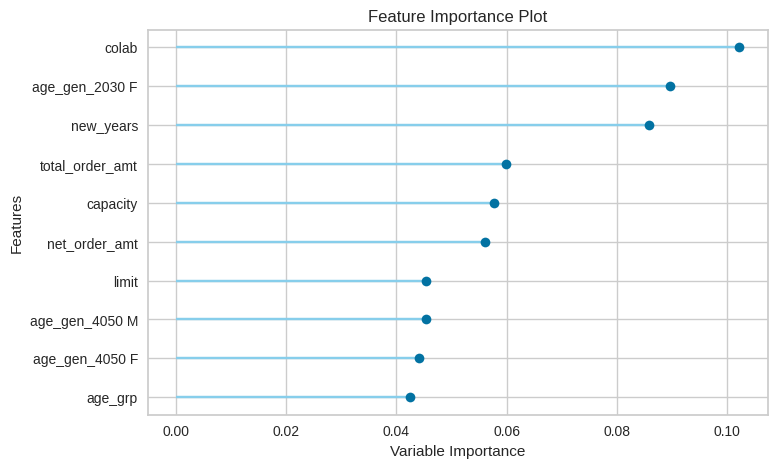

In [ ]:
best_model = compare_models()
plot_model(best_model, plot='feature')

# automl (윤)

In [ ]:
seed = 42

In [ ]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.6/483.6 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 14.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 3.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 67.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.4 MB/s eta 0:00:00


In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/BDA 공모전/BDA 공모전/입실렌티전야제
emp_df = pd.read_csv('emp_train_v4.csv')

/content/drive/.shortcut-targets-by-id/11I-rKkyrnUaOhSTzVScvbROijR4qxGDQ/BDA 공모전/입실렌티전야제


In [ ]:
emp_df.head(3)

,Unnamed: 0,scd,product_name,net_order_qty,net_order_amt,gender,age_grp,employee_yn,order_date,prime_yn,...,mid_cat2,expir,set,event,prod_processed,main_cat2,matches,capacity,weight,gift
0,0,20230124153976,잔칫집 식혜 240ml 30입,1,9.803170,F,2,Y,20230124,N,...,502,0,0,0,잔칫집 식혜,5,240ml,0,240.0,0
1,1,20230124153976,고메 칠리감바스 피자 350g,1,9.103089,F,2,Y,20230124,N,...,2002,0,0,0,고메 칠리감바스 피자,20,350g,0,350.0,0
2,2,20230124153976,고메 포테이토치즈 핫도그400g,1,9.151969,F,2,Y,20230124,N,...,2101,0,0,0,고메 포테이토치즈 핫도그,21,400g,0,400.0,0


In [ ]:
emp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19805 entries, 0 to 19804
Data columns (total 34 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       19805 non-null  int64  
 1   scd              19805 non-null  int64  
 2   product_name     19805 non-null  object 
 3   net_order_qty    19805 non-null  int64  
 4   net_order_amt    19805 non-null  float64
 5   gender           19805 non-null  object 
 6   age_grp          19805 non-null  int64  
 7   employee_yn      19805 non-null  object 
 8   order_date       19805 non-null  int64  
 9   prime_yn         19805 non-null  object 
 10  total_order_amt  19805 non-null  float64
 11  brand            19805 non-null  object 
 12  festival         19805 non-null  int64  
 13  salary           19805 non-null  int64  
 14  age_gen          19805 non-null  object 
 15  real_product     19805 non-null  object 
 16  limit            19805 non-null  int64  
 17  pre_dcnt    

In [ ]:
emp_df1 = emp_df.drop(['product_name', 'employee_yn', 'real_product', 'prod_processed', 'matches' ], axis = 1)

In [ ]:
emp_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19805 entries, 0 to 19804
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   scd              19805 non-null  int64  
 1   net_order_qty    19805 non-null  int64  
 2   net_order_amt    19805 non-null  float64
 3   order_date       19805 non-null  int64  
 4   prime_yn         19805 non-null  object 
 5   total_order_amt  19805 non-null  float64
 6   brand            19805 non-null  object 
 7   festival         19805 non-null  int64  
 8   salary           19805 non-null  int64  
 9   age_gen          19805 non-null  object 
 10  limit            19805 non-null  int64  
 11  pre_dcnt         19805 non-null  int64  
 12  colab            19805 non-null  int64  
 13  new_years        19805 non-null  int64  
 14  early_del        19805 non-null  int64  
 15  exclusive        19805 non-null  int64  
 16  dcnt             19805 non-null  int64  
 17  box         

In [ ]:
from pycaret.classification import *
clf1 = setup(data = emp_df1, target = 'prime_yn',train_size= 0.8,fold=5)

,Description,Value
0,Session id,7289
1,Target,prime_yn
2,Target type,Binary
3,Target mapping,"N: 0, Y: 1"
4,Original data shape,"(19805, 29)"
5,Transformed data shape,"(19805, 34)"
6,Transformed train set shape,"(15844, 34)"
7,Transformed test set shape,"(3961, 34)"
8,Ordinal features,1
9,Numeric features,25


In [ ]:
best_3 = compare_models(sort = 'f1', n_select = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.8814,0.9503,0.9446,0.8761,0.9090,0.7394,0.7438,3.6560
dt,Decision Tree Classifier,0.8504,0.8416,0.8762,0.8842,0.8802,0.6811,0.6812,1.1880
lightgbm,Light Gradient Boosting Machine,0.8363,0.9211,0.9473,0.8199,0.8790,0.6304,0.6463,0.9760
rf,Random Forest Classifier,0.8274,0.9088,0.9185,0.8259,0.8697,0.6163,0.6240,3.5280
et,Extra Trees Classifier,0.8239,0.9002,0.9006,0.8324,0.8652,0.6126,0.6166,3.7080
gbc,Gradient Boosting Classifier,0.7042,0.7745,0.9368,0.6964,0.7989,0.2831,0.3326,4.8880
lr,Logistic Regression,0.6272,0.5079,1.0000,0.6272,0.7709,0.0000,0.0000,0.7020
dummy,Dummy Classifier,0.6272,0.5000,1.0000,0.6272,0.7709,0.0000,0.0000,0.8980
nb,Naive Bayes,0.6261,0.5449,0.9947,0.6274,0.7694,0.0009,0.0022,0.5200
ada,Ada Boost Classifier,0.6472,0.6580,0.9053,0.6593,0.7630,0.1355,0.1654,2.1940


Processing:   0%|          | 0/67 [00:00<?, ?it/s]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.8814,0.9503,0.9446,0.8761,0.9090,0.7394,0.7438,0.4980
dt,Decision Tree Classifier,0.8504,0.8416,0.8762,0.8842,0.8802,0.6811,0.6812,0.5560
lightgbm,Light Gradient Boosting Machine,0.8363,0.9211,0.9473,0.8199,0.8790,0.6304,0.6463,0.4360
rf,Random Forest Classifier,0.8274,0.9088,0.9185,0.8259,0.8697,0.6163,0.6240,1.1960
et,Extra Trees Classifier,0.8239,0.9002,0.9006,0.8324,0.8652,0.6126,0.6166,0.9140
gbc,Gradient Boosting Classifier,0.7042,0.7745,0.9368,0.6964,0.7989,0.2831,0.3326,0.8400
ada,Ada Boost Classifier,0.6472,0.6580,0.9053,0.6593,0.7630,0.1355,0.1654,0.6060
ridge,Ridge Classifier,0.6384,0.0000,0.9220,0.6491,0.7618,0.0973,0.1294,0.7000
lda,Linear Discriminant Analysis,0.6384,0.6172,0.9133,0.6509,0.7601,0.1036,0.1330,0.6840
lr,Logistic Regression,0.6272,0.5079,1.0000,0.6272,0.7709,0.0000,0.0000,0.5840


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

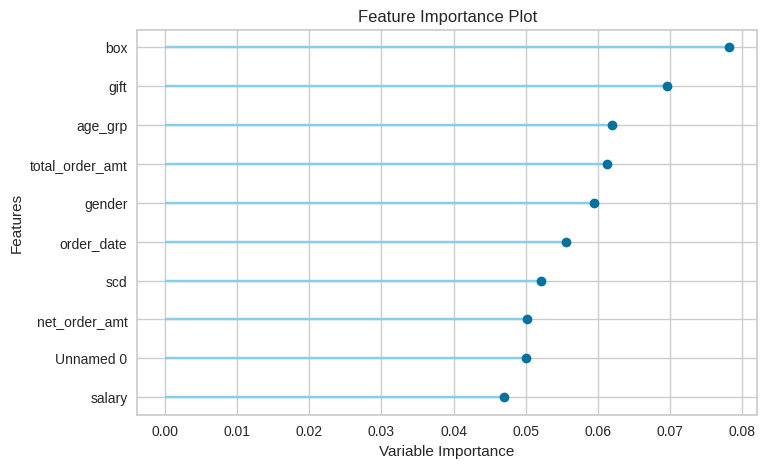

In [ ]:
best_model = compare_models()

# 랜덤 포레스트 모델 시각화
plot_model(best_model, plot='feature')

In [ ]:
#앙상블
blended = blend_models(estimator_list = best_3, fold = 5, method = 'soft' )

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8716,0.9522,0.9150,0.8843,0.8994,0.7220,0.7228
1,0.8593,0.9460,0.9014,0.8776,0.8893,0.6962,0.6967
2,0.8627,0.9524,0.9024,0.8815,0.8918,0.7041,0.7045
3,0.8596,0.9410,0.8948,0.8828,0.8888,0.6984,0.6985
4,0.8823,0.9578,0.9180,0.8968,0.9072,0.7462,0.7466
Mean,0.8671,0.9499,0.9063,0.8846,0.8953,0.7134,0.7138
Std,0.0088,0.0058,0.0088,0.0065,0.0071,0.0187,0.0188


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

#최종 모델 코드

In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/BDA 공모전/BDA 공모전/입실렌티전야제
emp_test = pd.read_csv('emp_test.csv')

/content/drive/.shortcut-targets-by-id/11I-rKkyrnUaOhSTzVScvbROijR4qxGDQ/BDA 공모전/입실렌티전야제


In [ ]:
emp_df3 = emp_df.drop(['product_name', 'employee_yn', 'real_product', 'prod_processed', 'matches' ], axis = 1)

In [ ]:
clf3 = setup(data = emp_df3, target = 'prime_yn',train_size= 0.8,fold=5)

In [ ]:
best_3_3 = compare_models(sort = 'f1', n_select = 1)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.8779,0.9494,0.9461,0.8706,0.9067,0.7310,0.7364,3.8900
lightgbm,Light Gradient Boosting Machine,0.8398,0.9251,0.9489,0.8228,0.8813,0.6384,0.6541,1.0060
dt,Decision Tree Classifier,0.8415,0.8323,0.8684,0.8775,0.8729,0.6622,0.6623,0.9120
rf,Random Forest Classifier,0.8297,0.9082,0.9204,0.8275,0.8715,0.6213,0.6292,6.5780
et,Extra Trees Classifier,0.8231,0.8988,0.9051,0.8288,0.8652,0.6095,0.6146,3.6460
gbc,Gradient Boosting Classifier,0.7026,0.7682,0.9378,0.6948,0.7982,0.2779,0.3286,4.0200
lr,Logistic Regression,0.6272,0.5116,1.0000,0.6272,0.7709,0.0000,0.0000,0.8180
nb,Naive Bayes,0.6272,0.5476,1.0000,0.6272,0.7709,0.0000,0.0000,0.5900
dummy,Dummy Classifier,0.6272,0.5000,1.0000,0.6272,0.7709,0.0000,0.0000,0.9960
ada,Ada Boost Classifier,0.6490,0.6509,0.9016,0.6615,0.7631,0.1434,0.1731,1.5960


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
emp_test3 = emp_test.drop('prime_yn', axis = 1)

In [ ]:
emp_test3 = emp_test3.drop(['product_name', 'employee_yn', 'real_product', 'prod_processed', 'matches' ], axis = 1)

In [ ]:
final_model = finalize_model(best_3_3)
predictions2 = predict_model(final_model, data = emp_test3)
predictions2

,Unnamed: 0,scd,net_order_qty,net_order_amt,gender,age_grp,order_date,total_order_amt,brand,festival,...,mid_cat2,expir,set,event,main_cat2,capacity,weight,gift,prediction_label,prediction_score
0,0,20230101970142,1,8.098947,M,4,20230101,52.732731,삼호,1,...,1801,0,0,0,18,0,200.0,0,N,0.9039
1,1,20230101970142,1,8.993303,M,4,20230101,52.732731,삼호,1,...,1906,0,0,0,19,0,413.0,0,N,0.8564
2,2,20230101970142,1,9.177713,M,4,20230101,52.732731,비비고,1,...,1901,0,0,0,19,0,700.0,0,N,0.5585
3,3,20230101970142,1,9.309552,M,4,20230101,52.732731,백설,1,...,2302,0,0,0,23,0,340.0,0,N,0.7963
4,4,20230101970142,1,8.169903,M,4,20230101,52.732731,NaN,1,...,2004,0,0,0,20,0,350.0,0,N,0.6871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8041,8041,20230115105218,2,11.953043,M,4,20230115,23.906086,명가,0,...,2001,0,0,0,20,0,0.0,0,Y,0.8124
8042,8042,20230103992088,6,12.476867,M,3,20230103,74.861198,타브랜드,1,...,702,0,0,0,7,1,1500.0,0,Y,0.6223
8043,8043,20230103990367,1,12.204807,M,3,20230103,12.204807,타브랜드,1,...,1901,0,0,0,19,1,3200.0,0,Y,0.8303
8044,8044,20230103991606,4,10.437902,M,3,20230103,41.751610,비비고,1,...,2001,0,0,0,20,0,455.0,0,Y,0.7396


In [ ]:
predictions2['prediction_label'].value_counts()

Y    5380
N    2666
Name: prediction_label, dtype: int64

In [ ]:
final_model = finalize_model(best_3_3)
predictions = predict_model(final_model, data = emp_test3)
predictions

,Unnamed: 0,scd,product_name,net_order_qty,net_order_amt,gender,age_grp,employee_yn,order_date,total_order_amt,...,set,event,prod_processed,main_cat2,matches,capacity,weight,gift,prediction_label,prediction_score
0,0,20230101970142,삼호 생선살어묵 야채 200g,1,8.098947,M,4,Y,20230101,52.732731,...,0,0,삼호 생선살어묵 야채,18,200g,0,200.0,0,N,0.9039
1,1,20230101970142,삼호 가쓰오모둠어묵탕413g,1,8.993303,M,4,Y,20230101,52.732731,...,0,0,삼호 가쓰오모둠어묵탕,19,413g,0,413.0,0,N,0.8564
2,2,20230101970142,(냉동) 비비고 테이블 특양지곰탕 700g,1,9.177713,M,4,Y,20230101,52.732731,...,0,0,냉동,19,700g,0,700.0,0,N,0.5585
3,3,20230101970142,백설 햄스빌두툼한굿베이컨340gX2개,1,9.309552,M,4,Y,20230101,52.732731,...,0,0,백설 햄스빌두툼한굿베이컨,23,340g,0,340.0,0,N,0.7963
4,4,20230101970142,삼호 떡보도반한찹쌀어묵 350g,1,8.169903,M,4,Y,20230101,52.732731,...,0,0,삼호 떡보도반한찹쌀어묵,20,350g,0,350.0,0,N,0.6871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8041,8041,20230115105218,CJ명가 토종김 3S호X5,2,11.953043,M,4,Y,20230115,23.906086,...,0,0,CJ명가 토종김,20,NaN,0,0.0,0,Y,0.8124
8042,8042,20230103992088,청도 반건시 선물세트 1.5kg,6,12.476867,M,3,Y,20230103,74.861198,...,0,0,청도 반건시 선물세트,7,1.5kg,1,1500.0,0,Y,0.6223
8043,8043,20230103990367,프레시웨이 LA갈비 선물세트 3.2kg,1,12.204807,M,3,Y,20230103,12.204807,...,0,0,프레시웨이 LA갈비 선물세트,19,3.2kg,1,3200.0,0,Y,0.8303
8044,8044,20230103991606,비비고 왕교자 455gx2개,4,10.437902,M,3,Y,20230103,41.751610,...,0,0,비비고 왕교자,20,455g,0,455.0,0,Y,0.7396


In [ ]:
predictions['prediction_label'].value_counts()

Y    5380
N    2666
Name: prediction_label, dtype: int64

In [ ]:
predictions2

,Unnamed: 0,scd,net_order_qty,net_order_amt,gender,age_grp,order_date,total_order_amt,brand,festival,...,mid_cat2,expir,set,event,main_cat2,capacity,weight,gift,prediction_label,prediction_score
0,0,20230101970142,1,8.098947,M,4,20230101,52.732731,삼호,1,...,1801,0,0,0,18,0,200.0,0,N,0.9039
1,1,20230101970142,1,8.993303,M,4,20230101,52.732731,삼호,1,...,1906,0,0,0,19,0,413.0,0,N,0.8564
2,2,20230101970142,1,9.177713,M,4,20230101,52.732731,비비고,1,...,1901,0,0,0,19,0,700.0,0,N,0.5585
3,3,20230101970142,1,9.309552,M,4,20230101,52.732731,백설,1,...,2302,0,0,0,23,0,340.0,0,N,0.7963
4,4,20230101970142,1,8.169903,M,4,20230101,52.732731,NaN,1,...,2004,0,0,0,20,0,350.0,0,N,0.6871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8041,8041,20230115105218,2,11.953043,M,4,20230115,23.906086,명가,0,...,2001,0,0,0,20,0,0.0,0,Y,0.8124
8042,8042,20230103992088,6,12.476867,M,3,20230103,74.861198,타브랜드,1,...,702,0,0,0,7,1,1500.0,0,Y,0.6223
8043,8043,20230103990367,1,12.204807,M,3,20230103,12.204807,타브랜드,1,...,1901,0,0,0,19,1,3200.0,0,Y,0.8303
8044,8044,20230103991606,4,10.437902,M,3,20230103,41.751610,비비고,1,...,2001,0,0,0,20,0,455.0,0,Y,0.7396


In [ ]:
emp_predict = predictions2.drop(['prediction_score'], axis = 1)
emp_predict.rename(columns = {'prediction_label': 'prime_yn'}, inplace = True)

In [ ]:
emp_predict

,Unnamed: 0,scd,net_order_qty,net_order_amt,gender,age_grp,order_date,total_order_amt,brand,festival,...,box,mid_cat2,expir,set,event,main_cat2,capacity,weight,gift,prime_yn
0,0,20230101970142,1,8.098947,M,4,20230101,52.732731,삼호,1,...,0,1801,0,0,0,18,0,200.0,0,N
1,1,20230101970142,1,8.993303,M,4,20230101,52.732731,삼호,1,...,0,1906,0,0,0,19,0,413.0,0,N
2,2,20230101970142,1,9.177713,M,4,20230101,52.732731,비비고,1,...,0,1901,0,0,0,19,0,700.0,0,N
3,3,20230101970142,1,9.309552,M,4,20230101,52.732731,백설,1,...,0,2302,0,0,0,23,0,340.0,0,N
4,4,20230101970142,1,8.169903,M,4,20230101,52.732731,NaN,1,...,0,2004,0,0,0,20,0,350.0,0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8041,8041,20230115105218,2,11.953043,M,4,20230115,23.906086,명가,0,...,0,2001,0,0,0,20,0,0.0,0,Y
8042,8042,20230103992088,6,12.476867,M,3,20230103,74.861198,타브랜드,1,...,0,702,0,0,0,7,1,1500.0,0,Y
8043,8043,20230103990367,1,12.204807,M,3,20230103,12.204807,타브랜드,1,...,0,1901,0,0,0,19,1,3200.0,0,Y
8044,8044,20230103991606,4,10.437902,M,3,20230103,41.751610,비비고,1,...,0,2001,0,0,0,20,0,455.0,0,Y


In [ ]:
emp_predict.to_csv('emp_pred.csv')

In [ ]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8046 entries, 0 to 8045
Data columns (total 36 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Unnamed: 0        8046 non-null   int32   
 1   scd               8046 non-null   int64   
 2   product_name      8046 non-null   category
 3   net_order_qty     8046 non-null   int8    
 4   net_order_amt     8046 non-null   float32 
 5   gender            8046 non-null   category
 6   age_grp           8046 non-null   int8    
 7   employee_yn       8046 non-null   category
 8   order_date        8046 non-null   int32   
 9   total_order_amt   8046 non-null   float32 
 10  brand             7894 non-null   category
 11  festival          8046 non-null   int8    
 12  salary            8046 non-null   int8    
 13  age_gen           8046 non-null   category
 14  real_product      8046 non-null   category
 15  limit             8046 non-null   int8    
 16  pre_dcnt          8046 n

In [ ]:
ipredictions.to_csv("emp_test_predict.csv")

1-2 시도

In [ ]:
emp_df3 = emp_df.drop(['product_name', 'employee_yn', 'real_product', 'prod_processed', 'matches' ], axis = 1)

In [ ]:
clf3 = setup(data = emp_df3, target = 'prime_yn',train_size= 0.8,fold=5)

,Description,Value
0,Session id,645
1,Target,prime_yn
2,Target type,Binary
3,Target mapping,"N: 0, Y: 1"
4,Original data shape,"(19805, 29)"
5,Transformed data shape,"(19805, 34)"
6,Transformed train set shape,"(15844, 34)"
7,Transformed test set shape,"(3961, 34)"
8,Ordinal features,1
9,Numeric features,25


In [ ]:
best_3_3 = compare_models(sort = 'f1', n_select = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.8804,0.9483,0.9443,0.8749,0.9083,0.7371,0.7416,4.6160
lightgbm,Light Gradient Boosting Machine,0.8405,0.9254,0.9501,0.8230,0.8820,0.6400,0.6560,1.0500
dt,Decision Tree Classifier,0.8451,0.8354,0.8736,0.8787,0.8762,0.6695,0.6695,1.3300
rf,Random Forest Classifier,0.8288,0.9088,0.9167,0.8286,0.8704,0.6201,0.6270,3.6920
et,Extra Trees Classifier,0.8278,0.9043,0.9017,0.8365,0.8678,0.6216,0.6253,4.2540
gbc,Gradient Boosting Classifier,0.7059,0.7734,0.9368,0.6978,0.7998,0.2878,0.3371,5.5100
lr,Logistic Regression,0.6272,0.5029,1.0000,0.6272,0.7709,0.0000,0.0000,1.2040
nb,Naive Bayes,0.6272,0.5487,1.0000,0.6272,0.7709,0.0000,0.0000,0.7520
dummy,Dummy Classifier,0.6272,0.5000,1.0000,0.6272,0.7709,0.0000,0.0000,1.5700
ada,Ada Boost Classifier,0.6455,0.6474,0.9098,0.6570,0.7629,0.1273,0.1589,2.0420


Processing:   0%|          | 0/67 [00:00<?, ?it/s]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.8814,0.9503,0.9446,0.8761,0.9090,0.7394,0.7438,0.4980
dt,Decision Tree Classifier,0.8504,0.8416,0.8762,0.8842,0.8802,0.6811,0.6812,0.5560
lightgbm,Light Gradient Boosting Machine,0.8363,0.9211,0.9473,0.8199,0.8790,0.6304,0.6463,0.4360
rf,Random Forest Classifier,0.8274,0.9088,0.9185,0.8259,0.8697,0.6163,0.6240,1.1960
et,Extra Trees Classifier,0.8239,0.9002,0.9006,0.8324,0.8652,0.6126,0.6166,0.9140
gbc,Gradient Boosting Classifier,0.7042,0.7745,0.9368,0.6964,0.7989,0.2831,0.3326,0.8400
ada,Ada Boost Classifier,0.6472,0.6580,0.9053,0.6593,0.7630,0.1355,0.1654,0.6060
ridge,Ridge Classifier,0.6384,0.0000,0.9220,0.6491,0.7618,0.0973,0.1294,0.7000
lda,Linear Discriminant Analysis,0.6384,0.6172,0.9133,0.6509,0.7601,0.1036,0.1330,0.6840
lr,Logistic Regression,0.6272,0.5079,1.0000,0.6272,0.7709,0.0000,0.0000,0.5840


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

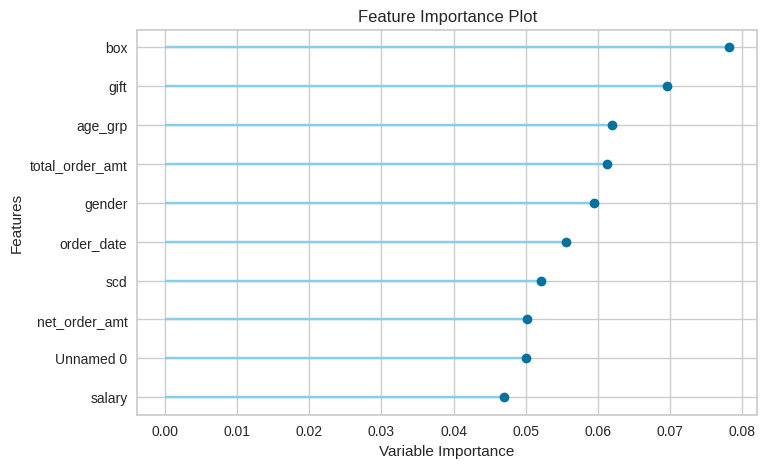

In [ ]:
# 랜덤 포레스트 모델 시각화
plot_model(best_3_3, plot='feature')

두 번째 시도

In [ ]:
emp_df2 = emp_df.drop(['product_name', 'employee_yn', 'real_product', 'prod_processed', 'matches','capacity'], axis = 1)

In [ ]:
clf2 = setup(data = emp_df2, target = 'prime_yn',train_size= 0.8,fold=5)

,Description,Value
0,Session id,3396
1,Target,prime_yn
2,Target type,Binary
3,Target mapping,"N: 0, Y: 1"
4,Original data shape,"(19805, 28)"
5,Transformed data shape,"(19805, 33)"
6,Transformed train set shape,"(15844, 33)"
7,Transformed test set shape,"(3961, 33)"
8,Ordinal features,1
9,Numeric features,24


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.8779,0.9492,0.9411,0.8739,0.9062,0.7318,0.7360,4.0840
dt,Decision Tree Classifier,0.8403,0.8306,0.8685,0.8758,0.8721,0.6594,0.6595,1.2800
lightgbm,Light Gradient Boosting Machine,0.8378,0.9244,0.9465,0.8219,0.8798,0.6342,0.6494,1.5860
et,Extra Trees Classifier,0.8336,0.9125,0.9097,0.8386,0.8727,0.6335,0.6380,3.5480
rf,Random Forest Classifier,0.8329,0.9157,0.9217,0.8305,0.8737,0.6287,0.6362,3.6140
gbc,Gradient Boosting Classifier,0.7031,0.7737,0.9388,0.6949,0.7987,0.2787,0.3299,5.5580
ada,Ada Boost Classifier,0.6457,0.6518,0.9091,0.6573,0.7629,0.1286,0.1600,1.9460
ridge,Ridge Classifier,0.6391,0.0000,0.9218,0.6496,0.7621,0.0996,0.1319,0.7500
lda,Linear Discriminant Analysis,0.6389,0.6147,0.9122,0.6515,0.7601,0.1056,0.1348,0.7040
lr,Logistic Regression,0.6272,0.5071,1.0000,0.6272,0.7709,0.0000,0.0000,1.9300


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

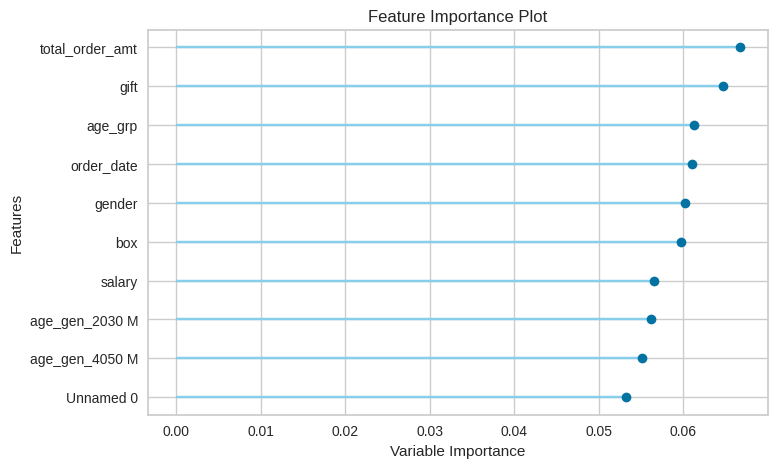

In [ ]:
best_model2 = compare_models()

# 랜덤 포레스트 모델 시각화
plot_model(best_model2, plot='feature')

# imbalanced dataset

In [ ]:
import imblearn
print(imblearn.__version__)

import pandas as pd
from collections import Counter
from matplotlib import pyplot


# 필요 함수 정의
def count_and_plot(y): 
    counter = Counter(y)
    for k,v in counter.items():
        print('Class=%d, n=%d (%.3f%%)' % (k, v, v / len(y) * 100))
    pyplot.bar(counter.keys(), counter.values())
    pyplot.show()
    

0.10.1


### SMOTE
:소수 클래스에 대해서 각각 샘플들의 KNN을 찾음. 그리고 그 이웃들 사이에 선을 그어 무작위 점을 생성한다.

샘플들의 특성을 반영한 데이터가 생성되기 때문에 오버 피팅에 강한 데이터가 생긴다. 

Class=0, n=12421 (50.000%)
Class=1, n=12421 (50.000%)


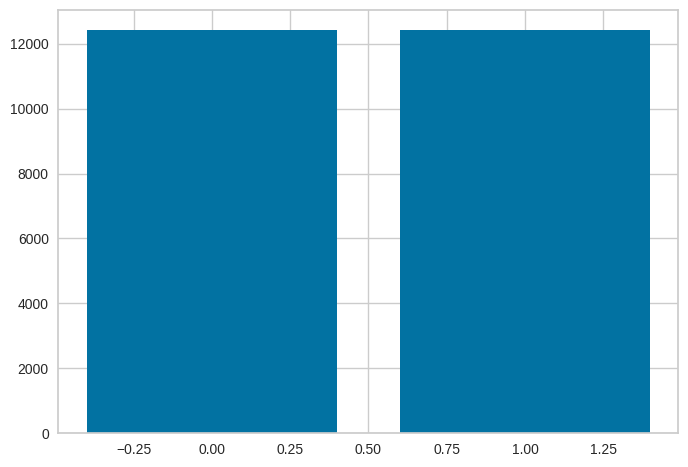

In [ ]:
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE(random_state=0).fit_resample(X, y)
count_and_plot(y_resampled)

In [ ]:
emp_df['prime_yn'].value_counts()

Y    12421
N     7384
Name: prime_yn, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [ ]:
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300] 
}

In [ ]:
# Create the XGBoost classifier
xgb_classifier = xgb.XGBClassifier()

# Perform k-fold cross-validation with grid search
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(xgb_classifier, param_grid, scoring='f1', cv=kfold)
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [ ]:
print('final params', grid_search.best_params_)   # 최적의 파라미터 값 출력
print('best score', grid_search.best_score_)      # 최고의 점수

final params {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300}
best score 0.8692120720478321


In [ ]:
# Train the model with the best parameters
best_model.fit(X_train, y_train)

# Predict on the test set
y_pred = best_model.predict(X_test)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score: %.4f" % f1)

F1 Score: 0.8900


### SMOTE- Logistic Regression

In [ ]:
scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [ ]:
# Define the parameter grid for grid search
param_grid = {
    'C': [0.1, 1.0, 10.0],
    'penalty': ['l1', 'l2']
}

# Create the Logistic Regression classifier
logreg = LogisticRegression()

# Perform k-fold cross-validation with grid search
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(logreg, param_grid, scoring='f1', cv=kfold)
grid_search.fit(scaled_X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [ ]:
print('final params', grid_search.best_params_) 
print('best score', grid_search.best_score_) 

final params {'C': 10.0, 'penalty': 'l2'}
best score 0.7514252690162124


In [ ]:
# Train the model with the best parameters
best_model.fit(scaled_X_train, y_train)

# Predict on the test set
y_pred = best_model.predict(scaled_X_test)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score: %.5f" % f1)

F1 Score: 0.76512


### SMOTE - RandomForest

In [ ]:
# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [3, 5, None]
}

# Create the Random Forest classifier
rf = RandomForestClassifier()

# Perform k-fold cross-validation with grid search
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(rf, param_grid, scoring='f1', cv=kfold)
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [ ]:
print('final params', grid_search.best_params_) 
print('best score', grid_search.best_score_)

final params {'max_depth': None, 'n_estimators': 200}
best score 0.8162195054311718


In [ ]:
# Train the model with the best parameters
best_model.fit(X_train, y_train)

# Predict on the test set
y_pred = best_model.predict(X_test)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score: %.5f" % f1)

F1 Score: 0.83794
